In [1]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf


print(tf.__version__)

2.16.1


In [2]:
#!pip install tensorflow-datasets

In [3]:
#pip show tensorflow-datasets

In [4]:
#import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
#!pip install scikit-learn


In [6]:
from sklearn.model_selection import train_test_split

import pandas as pd

In [7]:
df = pd.read_csv('C:/Users/sophi/Ironhack/Ironhack/LinkedIn/Harshit_Tyagi/data.csv')

In [8]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [9]:
df['Sentiment'].value_counts()

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

In [10]:
#split data into test and train set

In [11]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
# Create empty lists to store sentences and labels
train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

In [ ]:
## Iterate over the train data to extract sentences and labels
#for index, row in train_df.iterrows():
#    train_sentences.append(row['Sentence'])
#    train_labels.append(row['Sentiment'])

## Iterate over the test data to extract sentences and labels
#for index, row in test_df.iterrows():
#    test_sentences.append(row['Sentence'])
#    test_labels.append(row['Sentiment'])

# Print to verify the results
#print("Training sentences:", train_sentences)
#print("Test sentences:", test_sentences)
#print("Training labels:", train_labels)
#print("Test labels:", test_labels)

In [13]:
train_data = tf.data.Dataset.from_tensor_slices((train_df['Sentence'].values, train_df['Sentiment'].values))
test_data = tf.data.Dataset.from_tensor_slices((test_df['Sentence'].values, test_df['Sentiment'].values))



In [14]:
# Iterate over the train data to extract sentences and labels
for sent, label in train_data:
    train_sentences.append(sent.numpy().decode('utf-8'))
    train_labels.append(label.numpy())

# Iterate over the test data to extract sentences and labels
for sent, label in test_data:
    test_sentences.append(sent.numpy().decode('utf-8'))
    test_labels.append(label.numpy())

## Converting train and test_labels into integers before converting it into a np array 

In [15]:
# Get unique values in the labels array
unique_labels = np.unique(train_labels)
unique_labels

array([b'negative', b'neutral', b'positive'], dtype='|S8')

In [16]:
# Create a dictionary to map each unique value to an integer
label_to_int = {label: i for i, label in enumerate(unique_labels)}

# Map each label to its corresponding integer value
train_labels = np.array([label_to_int[label] for label in train_labels])
test_labels = np.array([label_to_int[label] for label in test_labels])

# Now train_labels_int and test_labels_int contain integer representations of your labels

In [17]:
##convert lists into numpy array
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [18]:
print(type(train_labels))

<class 'numpy.ndarray'>


In [19]:
import numpy as np

if np.issubdtype(train_labels.dtype, np.integer):
    print("Labels are integers.")
else:
    print("Labels are not integers.")

Labels are integers.


In [ ]:
#import numpy as np
#from collections import Counter
#from tensorflow.keras.preprocessing.text import Tokenizer

# Combine sentences from train and test datasets into a single list
#all_sentences = train_sentences + test_sentences

# Tokenize the combined list of sentences
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts(all_sentences)

# Get the vocabulary size
#vocab_size = len(tokenizer.word_index)

#print("Vocabulary Size:", vocab_size)


## Data preparation - setting up the tokenizer

In [20]:
##define the parameters for the tokenizing and padding
vocab_size = 11543
embedding_dim = 50
max_length = 100
trunc_type='post'
padding_type= 'post'
oov_tok = "<OOV>"

In [21]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_seqs, maxlen=max_length, truncating=trunc_type,  padding=padding_type)

##testing sequences and labels
test_seqs = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_seqs,maxlen=max_length, truncating=trunc_type,  padding=padding_type)

### Looking at one sentence to actually see how the padded sentence looks 

In [22]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(train_sentences[1])
print(train_padded[1])
print(decode_review(train_padded[1]))

no compensation for its news , opinions or distributions .
[ 230 1953    9   20  181 3411  117 2686    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
no compensation for its news opinions or distributions ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?


#### the sequential model compilation was not functional, potentially because the labels are np array of string and not integers. #### I wanted to check the same.

In [23]:
print(type(train_labels))

<class 'numpy.ndarray'>


In [24]:
print(train_labels.dtype)

int32


In [25]:
import numpy as np

if np.issubdtype(train_labels.dtype, np.integer):
    print("Labels are integers.")
else:
    print("Labels are not integers.")

Labels are integers.


##### The train_labels and test_labels are not integers

Define the Neural Network with Embedding layer
1. Use the Sequential API.
2. Add an embedding input layer of input size equal to vocabulary size.
3. Add a flatten layer, and two dense layers.

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

##compile the model with loss function, optimizer and metrics
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),  # Use GlobalAveragePooling1D instead of Flatten
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Adjust the number of units in the output layer to match the number of classes
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Model training

In [29]:
num_epochs = 10

##train the model with training and validation set
history = model.fit(
    train_padded, 
    train_labels, 
    epochs=num_epochs, 
    validation_data=(test_padded, test_labels)
    )

Epoch 1/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5224 - loss: 1.0049 - val_accuracy: 0.5321 - val_loss: 0.9808
Epoch 2/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5392 - loss: 0.9742 - val_accuracy: 0.5321 - val_loss: 0.9661
Epoch 3/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5455 - loss: 0.9509 - val_accuracy: 0.5475 - val_loss: 0.9104
Epoch 4/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5949 - loss: 0.8851 - val_accuracy: 0.6467 - val_loss: 0.8615
Epoch 5/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6309 - loss: 0.8440 - val_accuracy: 0.5902 - val_loss: 0.8766
Epoch 6/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6751 - loss: 0.7969 - val_accuracy: 0.5954 - val_loss: 0.8850
Epoch 7/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7027 - loss: 0.7318 - val_accuracy: 0.6784 - val_loss: 0.7741
Epoch 8/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7021 - loss: 0.7008 - val_accu

## Deriving weights from the embedding layer

In [30]:
##isolating the first embedding layer
l1 = model.layers[0]

##extracting learned weights
weights = l1.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)
print(weights)

(11543, 50)
[[ 0.15365753  0.09400302 -0.2575944  ...  0.11015408  0.00582751
  -0.562321  ]
 [ 0.00818644  0.03311539 -0.00366473 ... -0.0167124  -0.01323563
  -0.00421375]
 [-0.1173635   0.25496337 -0.44946435 ... -0.1260381  -0.07682304
  -0.4080717 ]
 ...
 [ 0.04754164  0.01186676 -0.00328747 ... -0.02645949 -0.04449647
   0.00720779]
 [-0.03416187  0.03341535  0.0237584  ...  0.043086    0.04839975
   0.00758269]
 [ 0.04341562 -0.0460361  -0.04299494 ...  0.02977074  0.0386845
   0.04681382]]


## Downloading the vectors and metadata for https://projector.tensorflow.org/

In [ ]:
##import I/O module in python
import io


In [ ]:

##open the text stream for vectors
#vectors = io.open('vectors.tsv', 'w', encoding='utf-8')

##open the text stream for metadata
#meta = io.open('meta.tsv', 'w', encoding='utf-8')


##write each word and its corresponding embedding
#for index in range(1, vocab_size + 1):
#  word = reverse_word_index[index]  # flipping the key-value in word_index
#  embeddings = weights[index]
#  meta.write(word + "\n")
#  vectors.write('\t'.join([str(x) for x in embeddings]) + "\n")

##close the stream
#vectors.close()
#meta.close()

In [ ]:
# Print the number of unique words in your vocabulary
print("Number of unique words in vocabulary:", len(reverse_word_index))

# Check if the index causing the KeyError exists in the reverse_word_index dictionary
key_to_check = 10194
if key_to_check in reverse_word_index:
    print("Word at index", key_to_check, ":", reverse_word_index[key_to_check])
else:
    print("Word at index", key_to_check, "not found in vocabulary.")


In [ ]:
# Open the text stream for vectors
#vectors = io.open('vectors.tsv', 'w', encoding='utf-8')

# Open the text stream for metadata
#meta = io.open('meta.tsv', 'w', encoding='utf-8')

# Write each word and its corresponding embedding
#for index in range(1, vocab_size + 1):
#    if index in reverse_word_index:
#        word = reverse_word_index[index]
#        embeddings = weights[index]
#        meta.write(word + "\n")
#        vectors.write('\t'.join([str(x) for x in embeddings]) + "\n")
#    else:
#        print("Index", index, "not found in reverse_word_index.")

# Close the streams
#vectors.close()
#meta.close()


## Visualise the train & validation accuracy and loss

In [ ]:
!pip install matplotlib

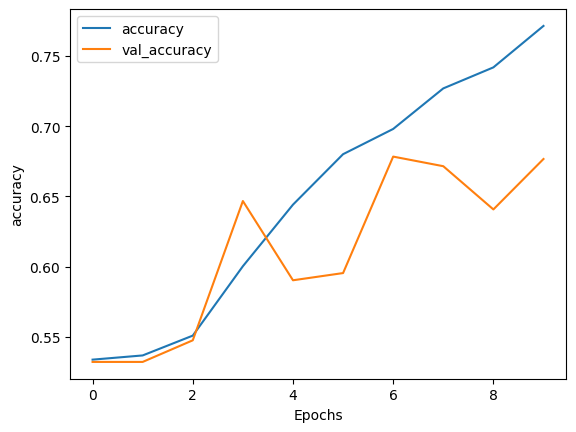

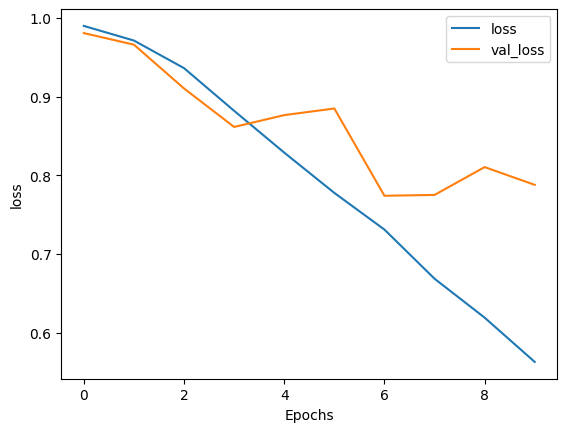

In [31]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Classifying a new sentence

In [70]:
sentence = ["Tesco share price down as grocer faces SFO investigation outcome", "the new year will see more investors rising in the banking sector", "Biotech companies will see a 10% increase in 2025", "the healthcare sector will lose 15% of its net income in 2026"]
##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
predictions = model.predict(padded_seqs)
print(model.predict(padded_seqs))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[0.21628363 0.5588156  0.22490083]
 [0.08649866 0.7419336  0.17156778]
 [0.12424014 0.3988374  0.4769225 ]
 [0.0788402  0.7722822  0.14887758]]


In [71]:
class_labels = ['negative', 'neutral', 'positive']  # example class labels
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [class_labels[idx] for idx in predicted_classes]
print(predicted_labels)


['neutral', 'neutral', 'positive', 'neutral']
